In [13]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
data = data.drop(columns=['Blood Pressure'])
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,Nothing
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,Nothing
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,Nothing
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea


In [19]:
X = data.drop(columns=['Person ID', 'Sleep Disorder'])
Y = data['Sleep Disorder']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

In [20]:
numerik = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']
kategori = ['Gender', 'Occupation', 'BMI Category']

In [21]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerik),
        ('cat', OneHotEncoder(handle_unknown='ignore'), kategori)
    ]
)

pipe = make_pipeline(
    preprocessor,
    DecisionTreeClassifier()
)

pipe.fit(X_train, Y_train)

,steps,"[('columntransformer', ...), ('decisiontreeclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [22]:
result = pipe.predict(X_test)

In [24]:
print("Accuracy: ", accuracy_score(Y_test, result) * 100)

Accuracy:  89.36170212765957


In [10]:
model = pipe.named_steps['decisiontreeclassifier']

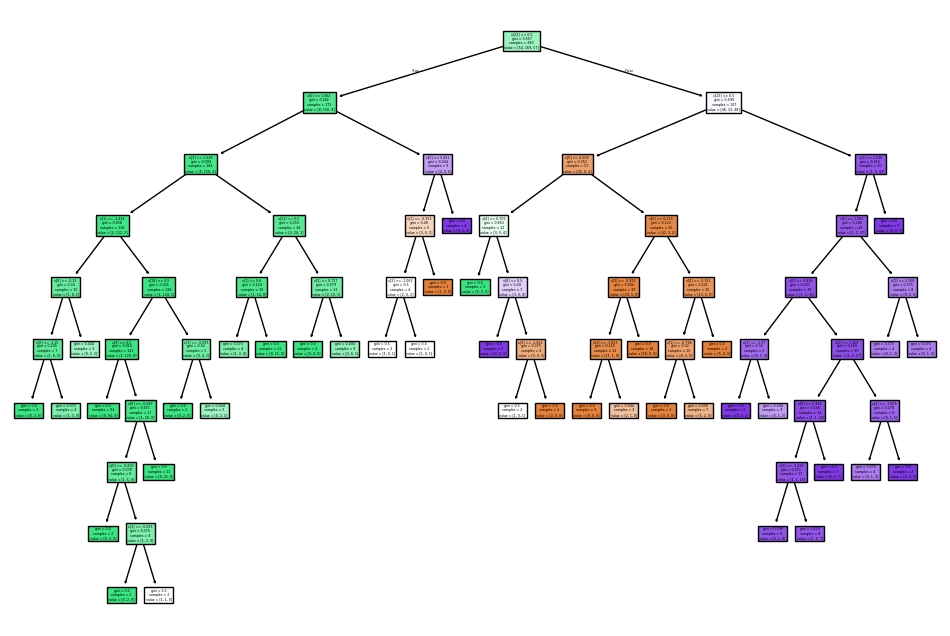

In [14]:
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True)
plt.show()